In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,precision_recall_curve,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize



In [2]:
def prec_recall(y_test,y_pred):
    precision=dict()
    recall=dict()
    for i in range(8):
        precision[i], recall[i], _ =precision_recall_curve(y_test[:, i],y_pred[:, i])
    lines = []
    labels = []
    colors=['cyan','green','red','yellow','magenta','blue','black','brown']
    for i, color in zip(range(8), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=3)
        lines.append(l)
        labels.append('Precision-recall for class {0}'''.format(i+1))
    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show(lines, labels)

In [3]:
def roc(y_test,y_pred):
    lines=[]
    labels=[]
    fpr = dict()
    tpr = dict()
    colors=['cyan','green','red','yellow','magenta','blue','black','brown']
    for i in range(8):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        
    for i, color in zip(range(8), colors):
        l, = plt.plot(fpr[i], tpr[i], color=color, lw=3)
        lines.append(l)
        labels.append('ROC Curve for class {0}'''.format(i+1))
    fig1 = plt.gcf()
    fig1.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Postive Rate')
    plt.title('ROC curve')
    plt.legend(lines, labels, loc=(0, -1.25), prop=dict(size=14))

    

In [4]:
def model(x_train,y_train,x_test,y_test):
    print("Model : Support Vector Machine ")
    param_grid={'C':[1,10,100,1000],'gamma':['auto','scale',0.1,0.01,0.001],'kernel':['rbf']}
    grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
    grid.fit(x_train,y_train)
    y_test_pred=grid.predict(x_test)
    print(grid.best_params_)
    acc_test=round(accuracy_score(y_test_pred,y_test),4)*100
    print("Accuracy of Model  on test set : ",acc_test)
    print('Classification Report :')
    print(classification_report(y_test,y_test_pred,digits=8))
    con_mat=confusion_matrix(y_test,y_test_pred,labels=[1,2,3,4,5,6,7,8])
    print("Confusion Matrix of Model on test set : ")
    print(con_mat)
    print("The total correctly classified data : ",np.trace(con_mat))
    classifier=OneVsRestClassifier(SVC(C=grid.best_params_['C'],gamma=grid.best_params_['gamma'],kernel='rbf',probability=True))
    y_pred=classifier.fit(x_train, y_train).predict_proba(x_test)
    y_test1=label_binarize(y_test, classes=[1,2,3,4,5,6,7,8])
    print('Precision-Recall Curve')
    prec_recall(y_test1,y_pred)
    print('ROC Curve')
    roc(y_test1,y_pred)

    

    
    
    

Model : Support Vector Machine 
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy of Model  on test set :  97.61
Classification Report :
              precision    recall  f1-score   support

           1  0.99328108 1.00000000 0.99662921       887
           2  1.00000000 1.00000000 1.00000000       883
           3  0.99429875 0.99316629 0.99373219       878
           4  0.99402628 0.93588301 0.96407879       889
           5  0.99329609 0.99775533 0.99552072       891
           6  0.89293139 0.98396334 0.93623978       873
           7  0.95107399 0.90568182 0.92782305       880
           8  0.99766082 0.99301513 0.99533256       859

    accuracy                      0.97613636      7040
   macro avg  0.97707105 0.97618312 0.97616954      7040
weighted avg  0.97716131 0.97613636 0.97619237      7040

Confusion Matrix of Model on test set : 
[[887   0   0   0   0   0   0   0]
 [  0 883   0   0   0   0   0   0]
 [  1   0 872   5   0   0   0   0]
 [  5   0   5 832   0  20  27   0]

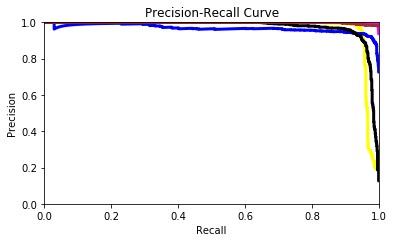

ROC Curve


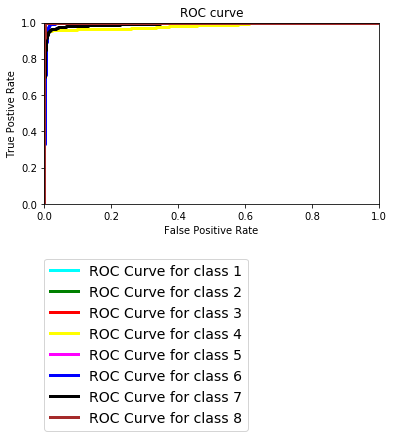

In [5]:
if __name__ == '__main__':
    train=pd.read_excel('S11_emgdata/S11_trainset_P135_70.xls')  #reading the xls file into dataframe
    test=pd.read_excel('S11_emgdata/S11_testset_P12345_30.xls')
    
    x_tr=train.drop(43,axis=1)    #separating the target values
    y_tr=train[43]
    x_te=test.drop(43,axis=1)
    y_te=test[43]
    
    x_train=x_tr.to_numpy()        # converting dataframe to numpy array
    y_train=y_tr.to_numpy()
    x_test=x_te.to_numpy()
    y_test=y_te.to_numpy()
    
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)       #standardizing the features for better traing process
    x_test=sc.fit_transform(x_test)
    model(x_train,y_train,x_test,y_test)
    
    